# **Q3**

Recording: [Maman13Q3 recording](https://drive.google.com/file/d/1YmWUOP68D5XqBBGl0_igF-zqOghKadZn/view?usp=sharing)

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.11.0+cu113
Torchvision Version:  0.12.0+cu113


In [ ]:
# device object
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

device

device(type='cuda', index=0)



---

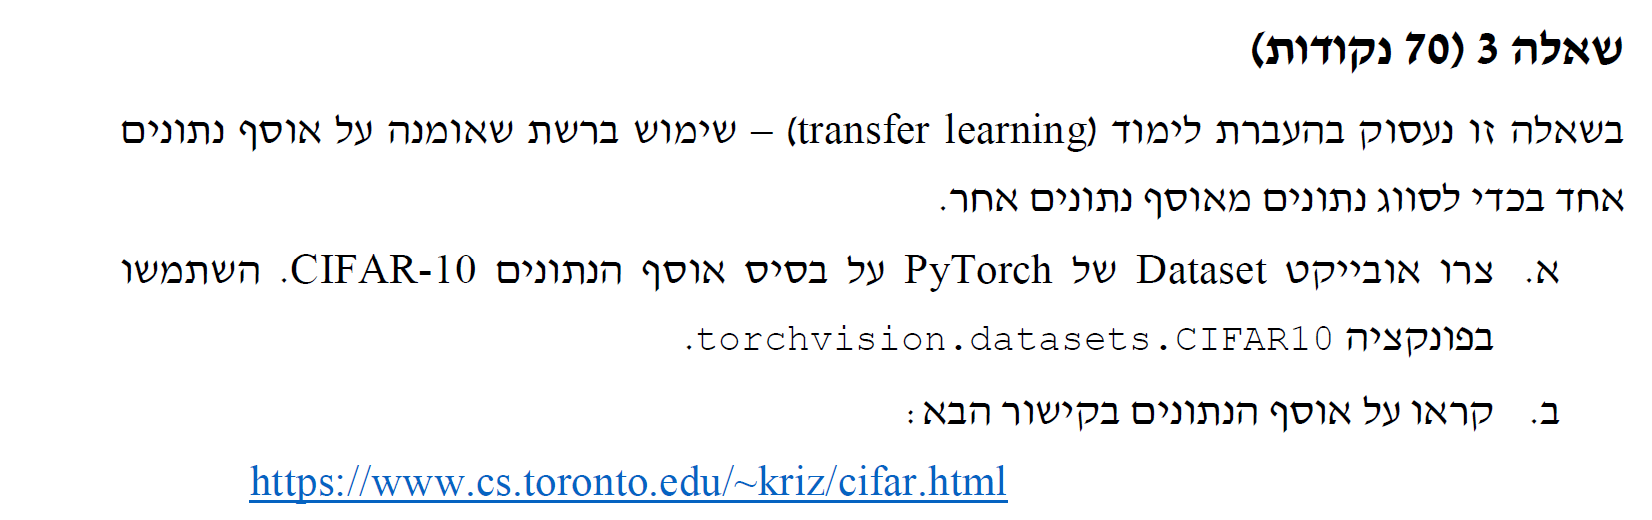

---



In [ ]:
basic_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize(
                                           (0.485, 0.456, 0.406), 
                                           (0.229, 0.224, 0.225)) # normalization
                                        ])

fotogenic_dataset = torchvision.datasets.CIFAR10(root="data/", download=True, transform=basic_transforms, train=True)

print("Initializing Datasets and Dataloaders...")


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data/
Initializing Datasets and Dataloaders...




---

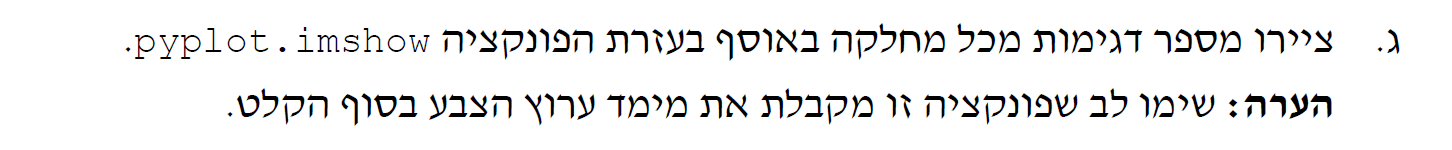

---



In [ ]:
batch_size = 100
num_workers = 2

fotogenic_dataloader = DataLoader(fotogenic_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

In [ ]:
classes = fotogenic_dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
class_to_id = fotogenic_dataset.class_to_idx
class_to_id

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

# **Show Some Images**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

# get some random training images
images, labels = iter(fotogenic_dataloader).next()

print(labels)

tensor([9, 8, 3, 0, 6, 6, 2, 1, 4, 2, 2, 4, 9, 5, 7, 7, 3, 8, 7, 0, 0, 3, 8, 1,
        7, 5, 6, 9, 7, 1, 7, 1, 6, 7, 3, 4, 5, 6, 0, 5, 8, 7, 6, 5, 2, 8, 5, 7,
        1, 1, 6, 6, 7, 3, 8, 3, 9, 3, 3, 9, 5, 2, 7, 4, 5, 7, 4, 9, 5, 8, 8, 1,
        9, 4, 7, 5, 3, 7, 2, 5, 0, 6, 4, 5, 8, 7, 8, 4, 1, 5, 0, 0, 1, 4, 1, 5,
        0, 4, 7, 2])


In [ ]:
def process_img(img):
  npimg = img.numpy().transpose(1, 2, 0)
  # undo image normalization
  npimg = std * npimg + mean
  npimg = np.clip(npimg, 0, 1)

  return npimg

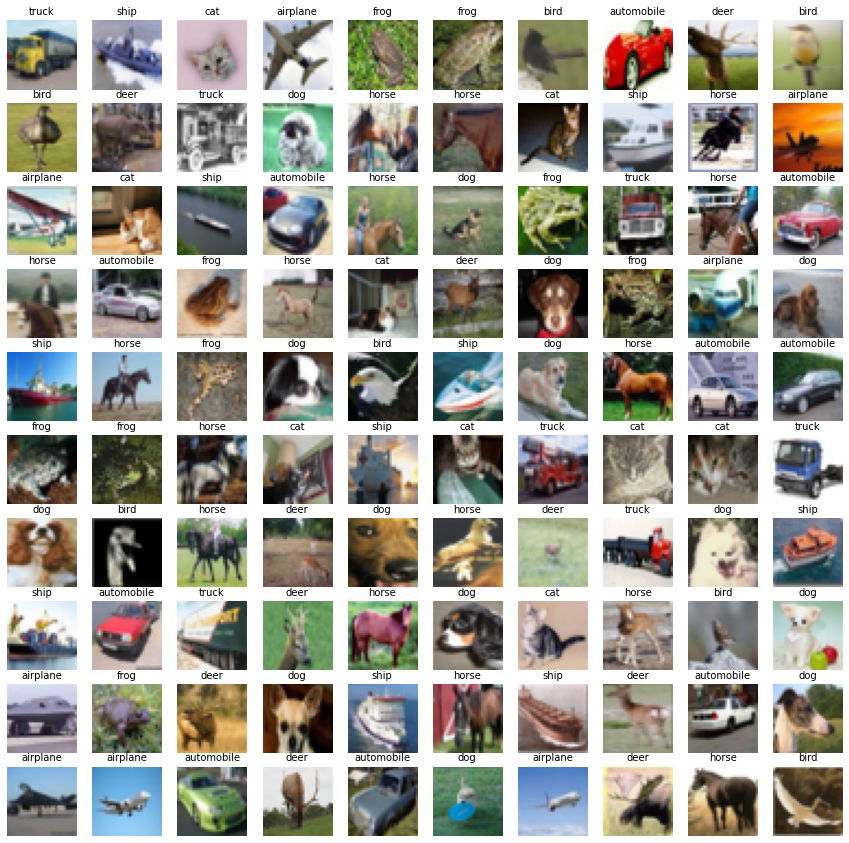

In [ ]:
def show_batch_of_images(images, labels, axis1, axis2):  
  fig, axes = plt.subplots(axis1, axis2, figsize = (15,15))
  for i, ax in enumerate(axes.ravel()):
      npimg = process_img(images[i])
      ax.imshow(npimg)
      ax.set_title(classes[labels[i]], fontsize = 10)
      ax.axis('off')

show_batch_of_images(images, labels, 10, 10)

airplane
[3, 19, 20, 38, 80, 90, 91, 96]


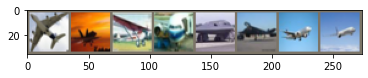

automobile
[7, 23, 29, 31, 48, 49, 71, 88, 92, 94]


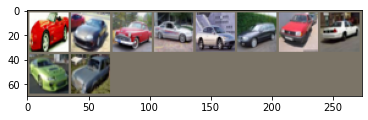

bird
[6, 9, 10, 44, 61, 78, 99]


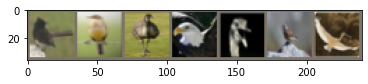

cat
[2, 16, 21, 34, 53, 55, 57, 58, 76]


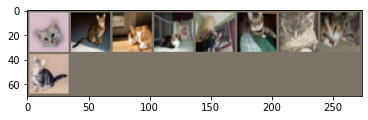

deer
[8, 11, 35, 63, 66, 73, 82, 87, 93, 97]


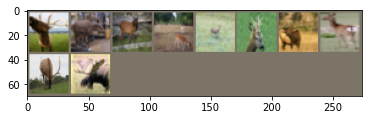

dog
[13, 25, 36, 39, 43, 46, 60, 64, 68, 75, 79, 83, 89, 95]


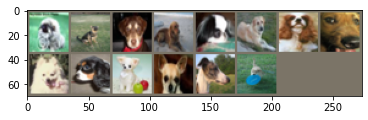

frog
[4, 5, 26, 32, 37, 42, 50, 51, 81]


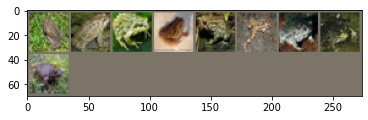

horse
[14, 15, 18, 24, 28, 30, 33, 41, 47, 52, 62, 65, 74, 77, 85, 98]


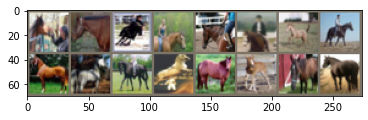

ship
[1, 17, 22, 40, 45, 54, 69, 70, 84, 86]


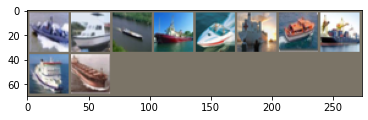

truck
[0, 12, 27, 56, 59, 67, 72]


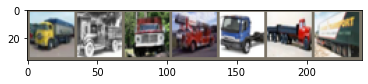

In [ ]:
from torch.utils.data import Subset

for cl in classes:
  print(cl)
  idx = fotogenic_dataset.class_to_idx[str(cl)]
  indices = [i for i in range(batch_size) if labels[i]==idx]
  cur_imgs = images[indices]
  print(indices)
  plt.imshow(process_img(torchvision.utils.make_grid(cur_imgs)))
  plt.show()

# **Setting transforms for train and test**

Some of these transforms, like random cropping make the images less obvious and therefore the model is required to be more tolerant

In [ ]:
input_size = 224
num_workers = 2

train_part = 0.8

In [ ]:
train_transforms = transforms.Compose([
                                      #Image resize must be (224 * 224) because, resnet accept input image size of (224 * 224).
                                      transforms.Resize((input_size, input_size)), 
                                      # transforms.RandomResizedCrop(input_size),
                                      transforms.RandomHorizontalFlip(),# data augmentation
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) # normalization
                                      ])

dataset = torchvision.datasets.CIFAR10(root="data/", download=True, transform=train_transforms)

print("Initializing TRAIN Datasets...")


Files already downloaded and verified
Initializing TRAIN Datasets...


In [ ]:
print("Randomly splitting TRAIN / TEST...")

train_size = int(train_part * len(dataset)) 
test_size = len(dataset) - train_size 

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

Randomly splitting TRAIN / TEST...


In [ ]:
# Batch size for training (change depending on how much memory you have)
train_batch_size = 128

train_iterations = int(train_size/train_batch_size)
print("Train batch size:", train_batch_size, "Train iterations:", train_iterations, sep="\n")

test_iterations = train_iterations
test_batch_size = int(test_size/test_iterations)
print("Test batch size:", train_batch_size, "Test iterations:", train_iterations, sep="\n")

print("Initializing TRAIN Dataloader...")
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True, num_workers=num_workers)

print("Initializing TEST Dataloader...")
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False, num_workers=num_workers)

Train batch size:
128
Train iterations:
312
Test batch size:
128
Test iterations:
312
Initializing TRAIN Dataloader...
Initializing TEST Dataloader...




---

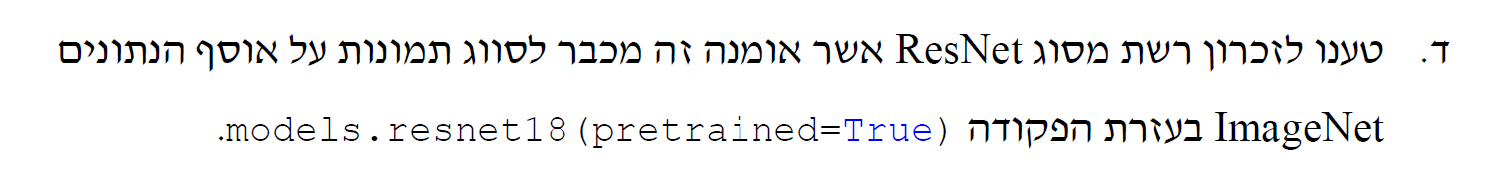

---



# **Initializing ResNet18 with pretrained weights**

In [ ]:
# get the model with pre-trained weights
resnet18 = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]



---

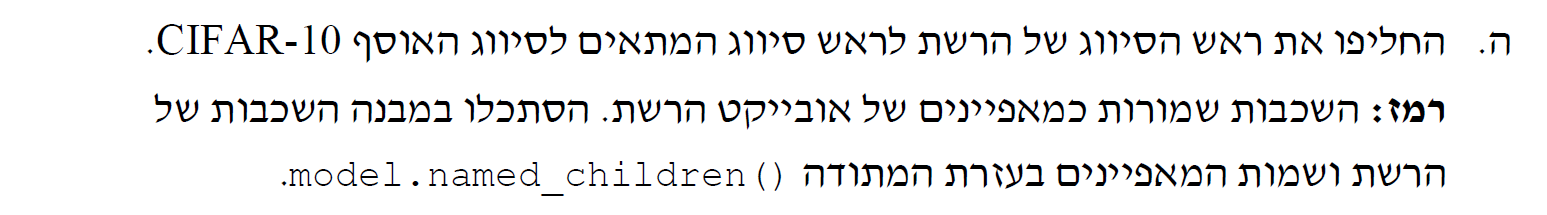

---



In [ ]:
from torch import nn

# freeze all the layers
for param in resnet18.parameters():
    param.requires_grad = False

#extract fc layers features
num_features = resnet18.fc.in_features     
# set the final FC layer to what we require for our problem
resnet18.fc = nn.Linear(num_features, len(classes))

# unfreeze the last layer so it learns on our dataset
for param in resnet18.fc.parameters():
  param.requires_grad = True

# print and check what the last FC layer is: 
# Linear(in_features=512, out_features=10, bias=True)
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  



---

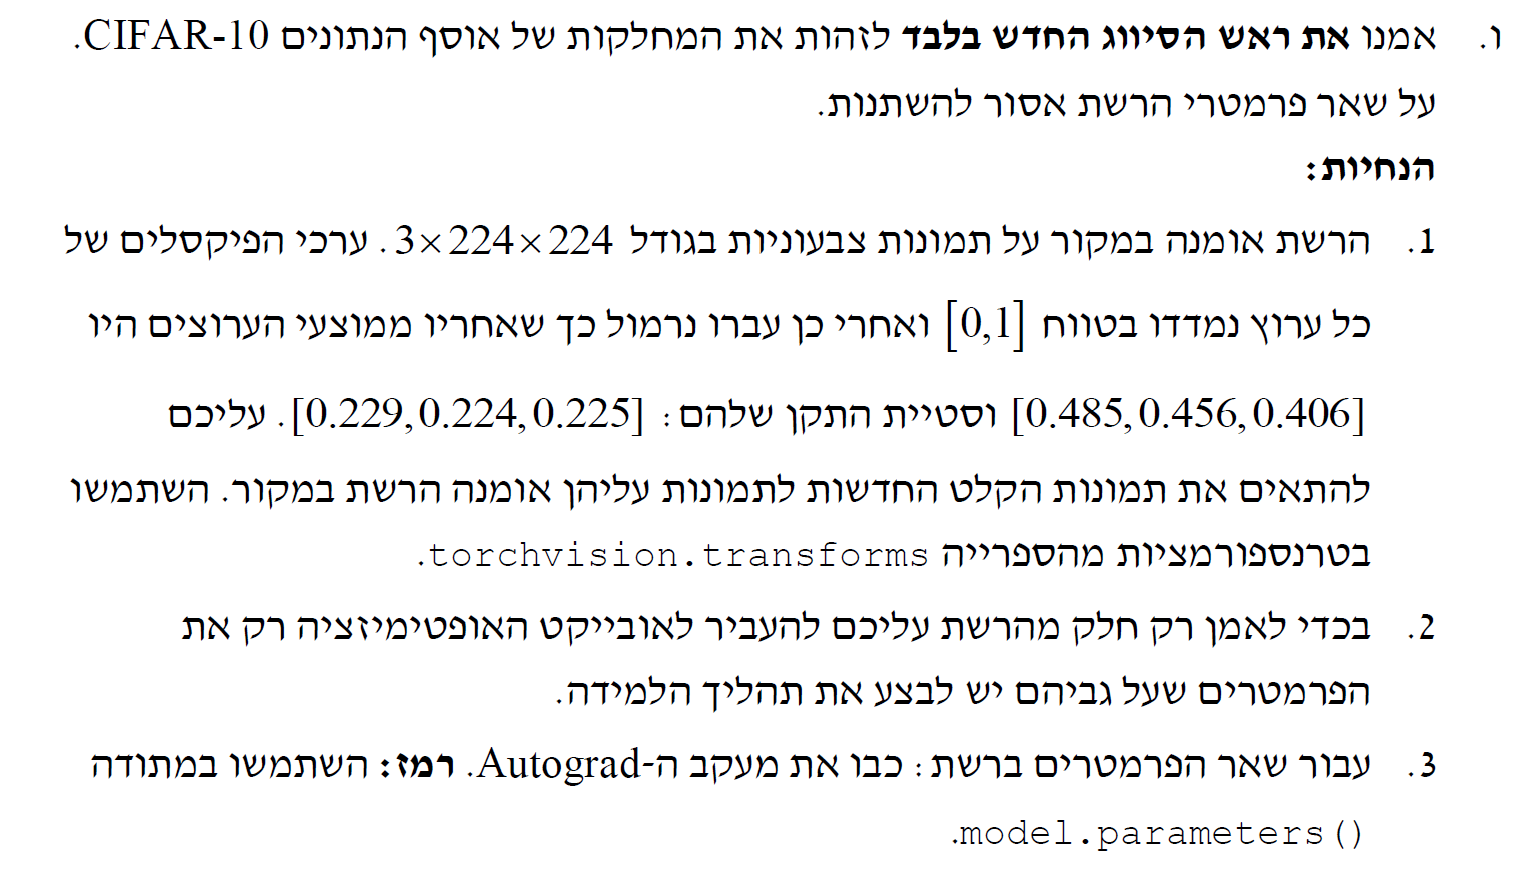

---



In [ ]:
# set optimizer
lr = 1e-2
momentum=0.9

resnet18 = resnet18.to(device) 
criterion = nn.CrossEntropyLoss()  #(set loss function)
optimizer = torch.optim.SGD(resnet18.parameters(), lr=lr, momentum=momentum)

# Number of classes in the dataset
num_classes = len(classes)

In [ ]:
def train_epoch(loader, net, opt, loss_func, trainloss, trainacc):
  net.train()    #(training model)
  running_loss = 0.   #(set loss 0)
  running_corrects = 0 

  # load a batch data of images
  for inputs, labels in tqdm(loader):
    inputs = inputs.to(device)
    labels = labels.to(device) 
    
    # forward inputs and get output
    opt.zero_grad()
    outputs = net(inputs)
    _, preds = torch.max(outputs, 1)
    loss = loss_func(outputs, labels)
    trainloss.append(loss.cpu().detach())

    # get loss value and update the network weights
    loss.backward()
    opt.step()
    running_loss += loss.item() * inputs.size(0)

    epoch_running_acc = torch.sum(preds == labels.data)
    running_corrects += epoch_running_acc
    trainacc.append(epoch_running_acc.cpu().detach()/len(labels))

  epoch_loss = running_loss / len(train_dataset)
  epoch_acc = running_corrects / len(train_dataset) * 100.
  return epoch_loss, epoch_acc

In [ ]:
def test_epoch(loader, net, loss_func, testloss, testacc):
    net.eval()
    with torch.no_grad():
          test_running_loss = 0.
          test_running_corrects = 0
          
          for inputs, labels in tqdm(loader):
              inputs = inputs.to(device)
              labels = labels.to(device)
              outputs = net(inputs)
              _, preds = torch.max(outputs, 1)
              loss = loss_func(outputs, labels)
              testloss.append(loss.cpu().detach())

              test_running_loss += loss.item() * inputs.size(0)

              test_running_acc = torch.sum(preds == labels.data)
              test_running_corrects += test_running_acc
              testacc.append(test_running_acc.cpu().detach()/len(labels))

          epoch_loss = test_running_loss / len(test_dataset)
          epoch_acc = test_running_corrects / len(test_dataset) * 100.
    return epoch_loss, epoch_acc

In [ ]:
def plot_loss_and_acc(trainloss, trainacc, testloss, testacc):
  ''' plot loss and accuracy graphs '''
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), tight_layout=True)

  ax1.plot(trainloss[:-1], color='green',linestyle='-')
  ax1.plot(testloss[:-1], color='orange',linestyle='-')
  ax1.set_title('loss')
  ax1.legend(['train','test'])
  # ax1.legend(['train'])

  ax2.plot(trainacc[:-1], color='green',linestyle='-')
  ax2.plot(testacc[:-1], color='orange',linestyle='-')
  ax2.set_title('acc')
  _ =ax2.legend(['train','test'])
  # _ =ax2.legend(['test'])

In [ ]:
# Number of epochs to train for
num_epochs = 3

import time
from tqdm import tqdm

def train_model():
  start_time = time.time() #(for showing time)
  trainloss, trainacc = [], []
  testloss, testacc = [], []
  epoch_loss = torch.empty(num_epochs,device=device)
  epoch_acc = torch.empty(num_epochs,device=device)
  
  for epoch in range(num_epochs): #(loop for every epoch)
      print("Epoch {} running".format(epoch)) #(printing message)
      
      """ Training Phase """
      epoch_loss[epoch], epoch_acc[epoch] = train_epoch(train_loader, resnet18, optimizer, criterion, trainloss, trainacc)
      print('\n[TRAIN #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss[epoch], epoch_acc[epoch], time.time() -start_time))
      
      """ Testing Phase """
      test_epoch_loss, test_epoch_acc = test_epoch(test_loader, resnet18, criterion, testloss, testacc)
      print('[TEST #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, test_epoch_loss, test_epoch_acc, time.time()- start_time))
      print('*************************')

  plot_loss_and_acc(trainloss, trainacc, testloss, testacc) 
  return epoch_loss, epoch_acc

Epoch 0 running


100%|██████████| 313/313 [01:19<00:00,  3.94it/s]



[TRAIN #0] Loss: 0.7640 Acc: 73.9425% Time: 79.3615s


100%|██████████| 313/313 [00:20<00:00, 15.39it/s]


[TEST #0] Loss: 0.5971 Acc: 79.2600% Time: 99.7062s
*************************
Epoch 1 running


100%|██████████| 313/313 [01:18<00:00,  3.99it/s]



[TRAIN #1] Loss: 0.6062 Acc: 78.8450% Time: 178.2436s


100%|██████████| 313/313 [00:20<00:00, 15.28it/s]


[TEST #1] Loss: 0.5787 Acc: 80.2200% Time: 198.7434s
*************************
Epoch 2 running


100%|██████████| 313/313 [01:19<00:00,  3.93it/s]



[TRAIN #2] Loss: 0.5832 Acc: 79.9375% Time: 278.4194s


100%|██████████| 313/313 [00:20<00:00, 15.06it/s]


[TEST #2] Loss: 0.5812 Acc: 79.9900% Time: 299.2258s
*************************
Epoch 3 running


100%|██████████| 313/313 [01:20<00:00,  3.89it/s]



[TRAIN #3] Loss: 0.5621 Acc: 80.7000% Time: 379.7302s


100%|██████████| 313/313 [00:20<00:00, 15.00it/s]


[TEST #3] Loss: 0.5663 Acc: 80.2800% Time: 400.6160s
*************************
Epoch 4 running


100%|██████████| 313/313 [01:19<00:00,  3.92it/s]



[TRAIN #4] Loss: 0.5553 Acc: 80.7925% Time: 480.4048s


100%|██████████| 313/313 [00:20<00:00, 15.13it/s]


[TEST #4] Loss: 0.5694 Acc: 80.3500% Time: 501.1077s
*************************
Epoch 5 running


100%|██████████| 313/313 [01:19<00:00,  3.93it/s]



[TRAIN #5] Loss: 0.5596 Acc: 80.4525% Time: 580.8352s


100%|██████████| 313/313 [00:20<00:00, 15.07it/s]


[TEST #5] Loss: 0.5795 Acc: 79.7700% Time: 601.6132s
*************************
Epoch 6 running


100%|██████████| 313/313 [01:20<00:00,  3.87it/s]



[TRAIN #6] Loss: 0.5544 Acc: 80.7550% Time: 682.4507s


100%|██████████| 313/313 [00:20<00:00, 15.02it/s]


[TEST #6] Loss: 0.5890 Acc: 79.6000% Time: 703.3095s
*************************
Epoch 7 running


100%|██████████| 313/313 [01:19<00:00,  3.91it/s]



[TRAIN #7] Loss: 0.5591 Acc: 80.6975% Time: 783.3166s


100%|██████████| 313/313 [00:20<00:00, 14.99it/s]


[TEST #7] Loss: 0.5723 Acc: 80.5200% Time: 804.2133s
*************************
Epoch 8 running


100%|██████████| 313/313 [01:19<00:00,  3.92it/s]



[TRAIN #8] Loss: 0.5413 Acc: 81.2325% Time: 884.0885s


100%|██████████| 313/313 [00:20<00:00, 15.15it/s]


[TEST #8] Loss: 0.5818 Acc: 80.3700% Time: 904.7593s
*************************
Epoch 9 running


100%|██████████| 313/313 [01:20<00:00,  3.88it/s]



[TRAIN #9] Loss: 0.5412 Acc: 81.1850% Time: 985.3527s


100%|██████████| 313/313 [00:20<00:00, 15.05it/s]


[TEST #9] Loss: 0.6049 Acc: 79.2100% Time: 1006.1628s
*************************


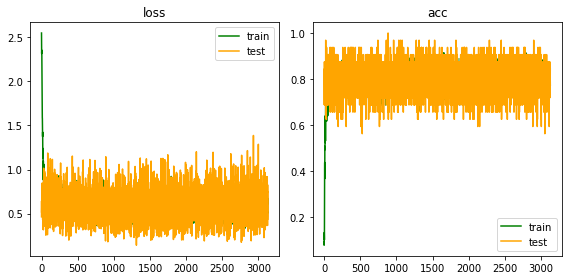

In [ ]:
# Number of epochs to train for
num_epochs = 10

epoch_loss, epoch_acc = train_model()

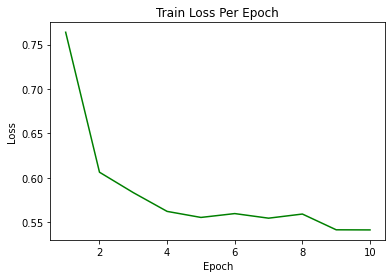

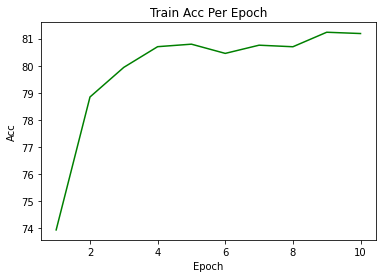

In [ ]:
plt.figure()
plt.title('Train Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1,num_epochs+1),epoch_loss.cpu().detach(),color='green',linestyle='-',label="Train_Loss")
plt.show()

plt.figure()
plt.title('Train Acc Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.plot(range(1,num_epochs+1),epoch_acc.cpu().detach(),color='green',linestyle='-',label="Train_Loss")
plt.show()

In [ ]:
save_path = 'resnet_18_final.pth'
torch.save(resnet18.state_dict(), save_path)



---

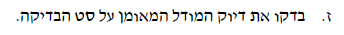

---



In [ ]:
""" Final Testing Phase """
testloss, testacc = [], []

test_final, test_final_acc = test_epoch(test_loader, resnet18, criterion, testloss, testacc)
print('[FINAL TEST] Loss: {:.4f} Acc: {:.4f}%'.format(test_final, test_final_acc))



100%|██████████| 313/313 [00:20<00:00, 15.24it/s]

[FINAL TEST] Loss: 0.6039 Acc: 79.2100%


# **Sanity check:** 
# **Results visualization**

In [ ]:
def visualize_model(model, dataloader, num_images=8):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {classes[preds[j]]}')
                ax.imshow(process_img(inputs.cpu().data[j]))

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

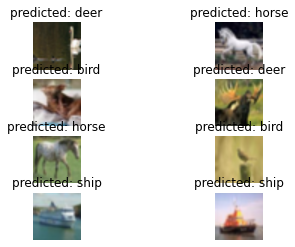

In [ ]:
visualize_model(resnet18, test_loader)




---

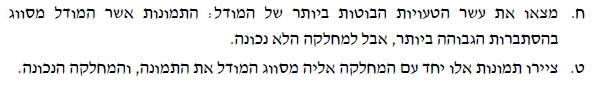

---



In [ ]:
device = 'cuda'
import torch, gc
import os

gc.collect()
torch.cuda.empty_cache()

In [ ]:
color_channels = 3

def collect_worst(amount, loader, net):
  amount_predictions = 0
  amount_bad_predictions = 0

  bad_imgs = torch.empty((amount,color_channels,input_size,input_size)).to(device)
  bad_img_labels = torch.empty(amount).to(device)

  worst_pred = torch.zeros(amount).to(device)
  worst_pred_labels = torch.empty(amount).to(device)

  net.eval()
  with torch.no_grad():
    for inputs, labels in tqdm(loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)
        # print(preds)
        amount_predictions += len(labels)

        wrong_predictions_idx = (preds != labels)
        amount_bad_predictions += len(wrong_predictions_idx)

        bad_preds = outputs[wrong_predictions_idx]
        imgs = inputs[wrong_predictions_idx]
        bad_labels = labels[wrong_predictions_idx]

        for idx, bad in enumerate(bad_preds):
          # print(idx)
          if worst_pred.min() < bad.max():
            id_to_replace = worst_pred.argmin()
            # print("Id to replace: ", id_to_replace)
            worst_pred[id_to_replace] = bad.max()
            worst_pred_labels[id_to_replace] = bad.argmax()
            bad_imgs[id_to_replace] = imgs[idx]
            bad_img_labels[id_to_replace] = bad_labels[idx]

    return worst_pred, worst_pred_labels, bad_imgs, bad_img_labels

In [ ]:
worst_pred, worst_pred_labels, bad_imgs, bad_img_labels = collect_worst(10, test_loader, resnet18)

100%|██████████| 313/313 [00:20<00:00, 15.06it/s]


Expected:  9  Predicted:  1


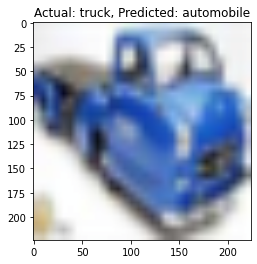

Expected:  2  Predicted:  0


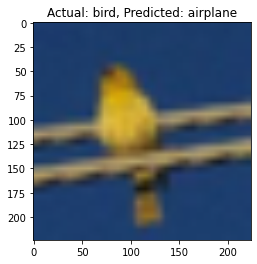

Expected:  2  Predicted:  4


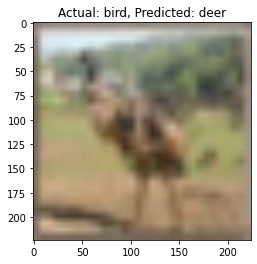

Expected:  1  Predicted:  9


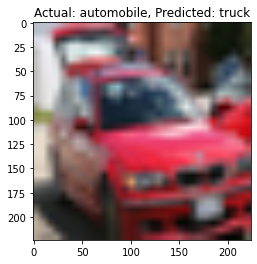

Expected:  9  Predicted:  1


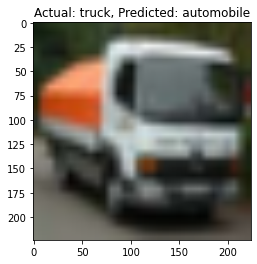

Expected:  1  Predicted:  9


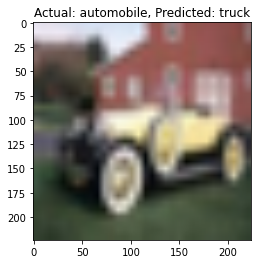

Expected:  9  Predicted:  1


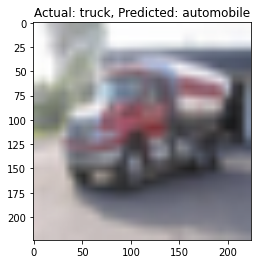

Expected:  9  Predicted:  1


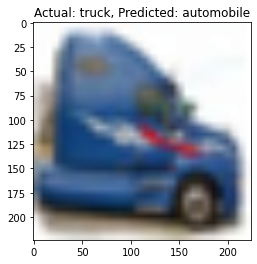

Expected:  9  Predicted:  1


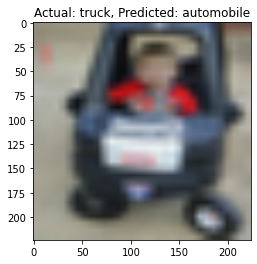

Expected:  9  Predicted:  1


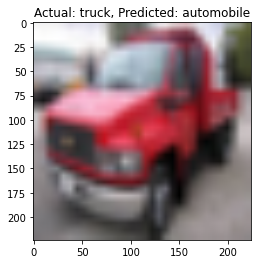

In [ ]:
original_image_size = 32
expected_labels = bad_img_labels.cpu().detach()
worst_predicted_labels = worst_pred_labels.cpu().detach()

# print(expected_labels)
# print(worst_predicted_labels)

for idx, image in enumerate(bad_imgs.cpu().detach()):
  expected = (int)(expected_labels[idx])
  predicted = (int)(worst_predicted_labels[idx])
  print("Expected: ", expected, " Predicted: ", predicted)
  plt.title(f'Actual: {classes[expected]}, Predicted: {classes[predicted]}')
  plt.imshow(process_img(image))
  plt.show()



---
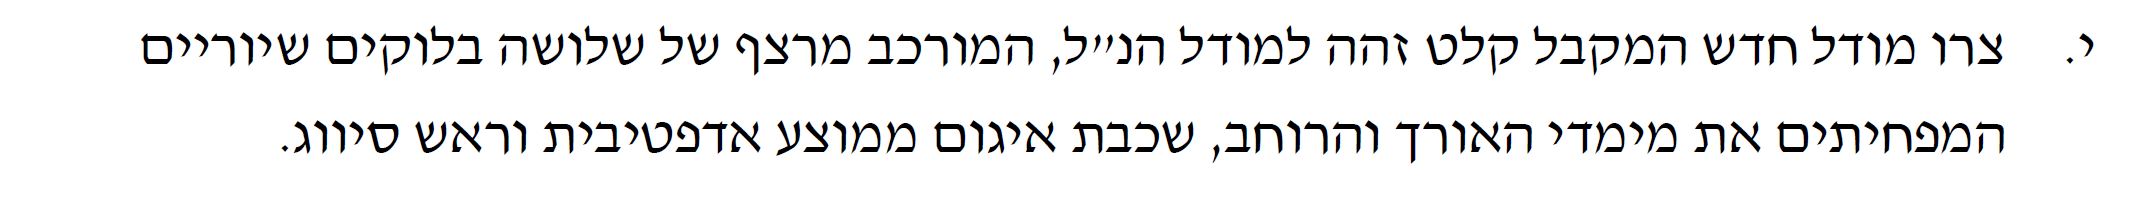


---



In [ ]:
from torch import nn

In [ ]:
class ResBlockDownSamp(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        out_channels=in_channels*2                           #                        
        self.relu=nn.ReLU()
        self.conv1=nn.Conv2d(in_channels,out_channels,3,
                             padding=1,stride=2,bias=False)  #
        
        self.bn1=nn.BatchNorm2d(out_channels)
        self.conv2=nn.Conv2d(out_channels,out_channels,3,
                             padding="same",bias=False)
        self.bn2=nn.BatchNorm2d(out_channels)
        
        self.downsampX=nn.Conv2d(in_channels,out_channels,1  #
                                 ,stride=2,bias=False)
    def forward(self, X):
        Y1  = self.conv1(X)
        Y1  = self.bn1(Y1)
        Y1  = self.relu(Y1)
        Y1  = self.conv2(Y1)
        Y1  = self.bn2(Y1)
        Y2  = Y1 + self.downsampX(X)                         #
        Y   = self.relu(Y2)
        return Y

In [ ]:
my_model = nn.Sequential(
    ResBlockDownSamp(3),
    ResBlockDownSamp(6),
    ResBlockDownSamp(12),
    nn.AdaptiveAvgPool2d(output_size=(1,1)),
    nn.Flatten(),
    nn.Linear(24, 10)
).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(my_model.parameters(), lr=0.01)

num_epochs = 50

In [ ]:
def train_my_model():
  start_time = time.time() #(for showing time)
  trainloss, trainacc = [], []
  testloss, testacc = [], []
  epoch_loss = torch.empty(num_epochs,device=device)
  epoch_acc = torch.empty(num_epochs,device=device)
  
  for epoch in range(num_epochs): #(loop for every epoch)
      print("Epoch {} running".format(epoch)) #(printing message)
      
      """ Training Phase """
      epoch_loss[epoch], epoch_acc[epoch] = train_epoch(train_loader, my_model, optimizer, criterion, trainloss, trainacc)
      print('\n[TRAIN #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss[epoch], epoch_acc[epoch], time.time() -start_time))
      
      """ Testing Phase """
      test_epoch_loss, test_epoch_acc = test_epoch(test_loader, my_model, criterion, testloss, testacc)
      print('[TEST #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, test_epoch_loss, test_epoch_acc, time.time()- start_time))
      print('*************************')

  plot_loss_and_acc(trainloss, trainacc, testloss, testacc) 
  return epoch_loss, epoch_acc

Epoch 0 running


100%|██████████| 313/313 [01:09<00:00,  4.51it/s]



[TRAIN #0] Loss: 2.1694 Acc: 18.7675% Time: 69.4349s


100%|██████████| 313/313 [00:18<00:00, 17.30it/s]


[TEST #0] Loss: 2.0949 Acc: 22.8300% Time: 87.5410s
*************************
Epoch 1 running


100%|██████████| 313/313 [01:10<00:00,  4.46it/s]



[TRAIN #1] Loss: 2.0340 Acc: 25.6775% Time: 157.6806s


100%|██████████| 313/313 [00:17<00:00, 17.77it/s]


[TEST #1] Loss: 1.9872 Acc: 27.3200% Time: 175.3062s
*************************
Epoch 2 running


100%|██████████| 313/313 [01:11<00:00,  4.40it/s]



[TRAIN #2] Loss: 1.9540 Acc: 28.6725% Time: 246.3981s


100%|██████████| 313/313 [00:17<00:00, 17.65it/s]


[TEST #2] Loss: 1.9189 Acc: 30.3100% Time: 264.1422s
*************************
Epoch 3 running


100%|██████████| 313/313 [01:10<00:00,  4.41it/s]



[TRAIN #3] Loss: 1.8969 Acc: 30.7500% Time: 335.1431s


100%|██████████| 313/313 [00:17<00:00, 17.49it/s]


[TEST #3] Loss: 1.9553 Acc: 25.9600% Time: 353.0524s
*************************
Epoch 4 running


100%|██████████| 313/313 [01:11<00:00,  4.40it/s]



[TRAIN #4] Loss: 1.8491 Acc: 32.4875% Time: 424.2141s


100%|██████████| 313/313 [00:17<00:00, 17.66it/s]


[TEST #4] Loss: 2.5484 Acc: 21.0700% Time: 441.9519s
*************************
Epoch 5 running


100%|██████████| 313/313 [01:11<00:00,  4.41it/s]



[TRAIN #5] Loss: 1.8044 Acc: 33.9050% Time: 513.0045s


100%|██████████| 313/313 [00:18<00:00, 17.02it/s]


[TEST #5] Loss: 1.8354 Acc: 31.4200% Time: 531.4129s
*************************
Epoch 6 running


100%|██████████| 313/313 [01:11<00:00,  4.38it/s]



[TRAIN #6] Loss: 1.7637 Acc: 35.3275% Time: 602.8775s


100%|██████████| 313/313 [00:18<00:00, 17.20it/s]


[TEST #6] Loss: 1.7463 Acc: 35.4300% Time: 621.0907s
*************************
Epoch 7 running


100%|██████████| 313/313 [01:11<00:00,  4.35it/s]



[TRAIN #7] Loss: 1.7249 Acc: 36.7250% Time: 693.0290s


100%|██████████| 313/313 [00:17<00:00, 17.52it/s]


[TEST #7] Loss: 1.7592 Acc: 34.0600% Time: 710.9039s
*************************
Epoch 8 running


100%|██████████| 313/313 [01:11<00:00,  4.36it/s]



[TRAIN #8] Loss: 1.6913 Acc: 37.7625% Time: 782.6384s


100%|██████████| 313/313 [00:17<00:00, 17.50it/s]


[TEST #8] Loss: 1.6898 Acc: 37.4000% Time: 800.5433s
*************************
Epoch 9 running


100%|██████████| 313/313 [01:09<00:00,  4.47it/s]



[TRAIN #9] Loss: 1.6623 Acc: 38.6150% Time: 870.5533s


100%|██████████| 313/313 [00:17<00:00, 17.44it/s]


[TEST #9] Loss: 1.6637 Acc: 37.8400% Time: 888.5186s
*************************
Epoch 10 running


100%|██████████| 313/313 [01:11<00:00,  4.39it/s]



[TRAIN #10] Loss: 1.6351 Acc: 40.1525% Time: 959.8388s


100%|██████████| 313/313 [00:17<00:00, 17.51it/s]


[TEST #10] Loss: 1.9057 Acc: 31.6600% Time: 977.7217s
*************************
Epoch 11 running


100%|██████████| 313/313 [01:11<00:00,  4.35it/s]



[TRAIN #11] Loss: 1.6079 Acc: 41.1350% Time: 1049.7261s


100%|██████████| 313/313 [00:17<00:00, 17.63it/s]


[TEST #11] Loss: 1.7125 Acc: 37.6100% Time: 1067.4975s
*************************
Epoch 12 running


100%|██████████| 313/313 [01:11<00:00,  4.40it/s]



[TRAIN #12] Loss: 1.5821 Acc: 42.3675% Time: 1138.6170s


100%|██████████| 313/313 [00:18<00:00, 17.35it/s]


[TEST #12] Loss: 1.6294 Acc: 39.1200% Time: 1156.6752s
*************************
Epoch 13 running


100%|██████████| 313/313 [01:12<00:00,  4.32it/s]



[TRAIN #13] Loss: 1.5558 Acc: 43.6025% Time: 1229.1098s


100%|██████████| 313/313 [00:18<00:00, 17.32it/s]


[TEST #13] Loss: 1.5843 Acc: 40.9400% Time: 1247.1953s
*************************
Epoch 14 running


100%|██████████| 313/313 [01:11<00:00,  4.40it/s]



[TRAIN #14] Loss: 1.5288 Acc: 44.5300% Time: 1318.4219s


100%|██████████| 313/313 [00:18<00:00, 17.15it/s]


[TEST #14] Loss: 1.6215 Acc: 41.5600% Time: 1336.6893s
*************************
Epoch 15 running


100%|██████████| 313/313 [01:11<00:00,  4.38it/s]



[TRAIN #15] Loss: 1.5110 Acc: 45.2550% Time: 1408.2350s


100%|██████████| 313/313 [00:17<00:00, 17.46it/s]


[TEST #15] Loss: 2.0154 Acc: 31.8600% Time: 1426.1793s
*************************
Epoch 16 running


100%|██████████| 313/313 [01:10<00:00,  4.43it/s]



[TRAIN #16] Loss: 1.4871 Acc: 46.1550% Time: 1496.8808s


100%|██████████| 313/313 [00:18<00:00, 17.23it/s]


[TEST #16] Loss: 1.5510 Acc: 42.8000% Time: 1515.0698s
*************************
Epoch 17 running


100%|██████████| 313/313 [01:10<00:00,  4.41it/s]



[TRAIN #17] Loss: 1.4656 Acc: 46.9675% Time: 1586.0400s


100%|██████████| 313/313 [00:18<00:00, 16.80it/s]


[TEST #17] Loss: 1.6456 Acc: 39.5500% Time: 1604.6829s
*************************
Epoch 18 running


100%|██████████| 313/313 [01:11<00:00,  4.35it/s]



[TRAIN #18] Loss: 1.4455 Acc: 47.9175% Time: 1676.6006s


100%|██████████| 313/313 [00:18<00:00, 17.28it/s]


[TEST #18] Loss: 1.5973 Acc: 40.6800% Time: 1694.7292s
*************************
Epoch 19 running


100%|██████████| 313/313 [01:11<00:00,  4.37it/s]



[TRAIN #19] Loss: 1.4291 Acc: 48.4500% Time: 1766.3544s


100%|██████████| 313/313 [00:17<00:00, 17.41it/s]


[TEST #19] Loss: 1.4444 Acc: 47.4500% Time: 1784.3481s
*************************
Epoch 20 running


100%|██████████| 313/313 [01:12<00:00,  4.33it/s]



[TRAIN #20] Loss: 1.4133 Acc: 49.2150% Time: 1856.7322s


100%|██████████| 313/313 [00:18<00:00, 17.34it/s]


[TEST #20] Loss: 1.4996 Acc: 45.8000% Time: 1874.8067s
*************************
Epoch 21 running


100%|██████████| 313/313 [01:12<00:00,  4.35it/s]



[TRAIN #21] Loss: 1.3991 Acc: 49.9875% Time: 1946.8480s


100%|██████████| 313/313 [00:18<00:00, 17.16it/s]


[TEST #21] Loss: 1.5370 Acc: 43.7100% Time: 1965.1116s
*************************
Epoch 22 running


100%|██████████| 313/313 [01:11<00:00,  4.36it/s]



[TRAIN #22] Loss: 1.3839 Acc: 50.2050% Time: 2036.9059s


100%|██████████| 313/313 [00:18<00:00, 17.00it/s]


[TEST #22] Loss: 2.6230 Acc: 28.7600% Time: 2055.3260s
*************************
Epoch 23 running


100%|██████████| 313/313 [01:11<00:00,  4.37it/s]



[TRAIN #23] Loss: 1.3690 Acc: 51.0550% Time: 2127.0368s


100%|██████████| 313/313 [00:18<00:00, 17.30it/s]


[TEST #23] Loss: 1.5740 Acc: 45.2100% Time: 2145.1443s
*************************
Epoch 24 running


100%|██████████| 313/313 [01:12<00:00,  4.29it/s]



[TRAIN #24] Loss: 1.3578 Acc: 51.2250% Time: 2218.0572s


100%|██████████| 313/313 [00:18<00:00, 17.07it/s]


[TEST #24] Loss: 1.8168 Acc: 38.0300% Time: 2236.4074s
*************************
Epoch 25 running


100%|██████████| 313/313 [01:12<00:00,  4.35it/s]



[TRAIN #25] Loss: 1.3429 Acc: 51.7225% Time: 2308.4451s


100%|██████████| 313/313 [00:18<00:00, 16.82it/s]


[TEST #25] Loss: 1.4278 Acc: 48.4700% Time: 2327.0689s
*************************
Epoch 26 running


100%|██████████| 313/313 [01:11<00:00,  4.40it/s]



[TRAIN #26] Loss: 1.3328 Acc: 52.0250% Time: 2398.3038s


100%|██████████| 313/313 [00:18<00:00, 17.18it/s]


[TEST #26] Loss: 1.5643 Acc: 41.6500% Time: 2416.5443s
*************************
Epoch 27 running


100%|██████████| 313/313 [01:11<00:00,  4.36it/s]



[TRAIN #27] Loss: 1.3235 Acc: 52.6350% Time: 2488.4368s


100%|██████████| 313/313 [00:18<00:00, 16.80it/s]


[TEST #27] Loss: 1.4062 Acc: 47.8900% Time: 2507.0754s
*************************
Epoch 28 running


100%|██████████| 313/313 [01:12<00:00,  4.31it/s]



[TRAIN #28] Loss: 1.3122 Acc: 53.1750% Time: 2579.6798s


100%|██████████| 313/313 [00:18<00:00, 17.32it/s]


[TEST #28] Loss: 1.9018 Acc: 37.2000% Time: 2597.7658s
*************************
Epoch 29 running


100%|██████████| 313/313 [01:12<00:00,  4.30it/s]



[TRAIN #29] Loss: 1.3023 Acc: 53.4400% Time: 2670.5319s


100%|██████████| 313/313 [00:18<00:00, 17.18it/s]


[TEST #29] Loss: 1.4527 Acc: 47.2500% Time: 2688.7702s
*************************
Epoch 30 running


100%|██████████| 313/313 [01:12<00:00,  4.34it/s]



[TRAIN #30] Loss: 1.2911 Acc: 54.1225% Time: 2760.8265s


100%|██████████| 313/313 [00:18<00:00, 17.12it/s]


[TEST #30] Loss: 2.1804 Acc: 32.6700% Time: 2779.1315s
*************************
Epoch 31 running


100%|██████████| 313/313 [01:13<00:00,  4.28it/s]



[TRAIN #31] Loss: 1.2783 Acc: 54.4325% Time: 2852.2225s


100%|██████████| 313/313 [00:18<00:00, 17.09it/s]


[TEST #31] Loss: 1.4833 Acc: 46.7200% Time: 2870.5492s
*************************
Epoch 32 running


100%|██████████| 313/313 [01:12<00:00,  4.32it/s]



[TRAIN #32] Loss: 1.2711 Acc: 54.9925% Time: 2943.1023s


100%|██████████| 313/313 [00:18<00:00, 17.00it/s]


[TEST #32] Loss: 1.3481 Acc: 50.9800% Time: 2961.5329s
*************************
Epoch 33 running


100%|██████████| 313/313 [01:10<00:00,  4.41it/s]



[TRAIN #33] Loss: 1.2645 Acc: 54.8675% Time: 3032.4658s


100%|██████████| 313/313 [00:18<00:00, 17.28it/s]


[TEST #33] Loss: 1.3155 Acc: 52.1100% Time: 3050.5984s
*************************
Epoch 34 running


100%|██████████| 313/313 [01:13<00:00,  4.27it/s]



[TRAIN #34] Loss: 1.2516 Acc: 55.5275% Time: 3123.9985s


100%|██████████| 313/313 [00:18<00:00, 17.24it/s]


[TEST #34] Loss: 1.3156 Acc: 52.5900% Time: 3142.1641s
*************************
Epoch 35 running


100%|██████████| 313/313 [01:12<00:00,  4.32it/s]



[TRAIN #35] Loss: 1.2440 Acc: 55.8700% Time: 3214.6296s


100%|██████████| 313/313 [00:17<00:00, 17.41it/s]


[TEST #35] Loss: 1.3295 Acc: 52.4200% Time: 3232.6280s
*************************
Epoch 36 running


100%|██████████| 313/313 [01:14<00:00,  4.23it/s]



[TRAIN #36] Loss: 1.2357 Acc: 56.0550% Time: 3306.7128s


100%|██████████| 313/313 [00:17<00:00, 17.50it/s]


[TEST #36] Loss: 1.2639 Acc: 54.5100% Time: 3324.6194s
*************************
Epoch 37 running


100%|██████████| 313/313 [01:13<00:00,  4.26it/s]



[TRAIN #37] Loss: 1.2276 Acc: 56.5500% Time: 3398.0928s


100%|██████████| 313/313 [00:18<00:00, 17.28it/s]


[TEST #37] Loss: 1.4489 Acc: 49.4000% Time: 3416.2227s
*************************
Epoch 38 running


100%|██████████| 313/313 [01:13<00:00,  4.25it/s]



[TRAIN #38] Loss: 1.2210 Acc: 56.6325% Time: 3489.8757s


100%|██████████| 313/313 [00:18<00:00, 17.10it/s]


[TEST #38] Loss: 1.7794 Acc: 40.7500% Time: 3508.1885s
*************************
Epoch 39 running


100%|██████████| 313/313 [01:10<00:00,  4.43it/s]



[TRAIN #39] Loss: 1.2125 Acc: 56.9225% Time: 3578.8377s


100%|██████████| 313/313 [00:18<00:00, 16.88it/s]


[TEST #39] Loss: 1.3333 Acc: 52.9900% Time: 3597.3970s
*************************
Epoch 40 running


100%|██████████| 313/313 [01:13<00:00,  4.26it/s]



[TRAIN #40] Loss: 1.2068 Acc: 57.2150% Time: 3670.9222s


100%|██████████| 313/313 [00:18<00:00, 17.06it/s]


[TEST #40] Loss: 1.9660 Acc: 37.0100% Time: 3689.2815s
*************************
Epoch 41 running


100%|██████████| 313/313 [01:13<00:00,  4.24it/s]



[TRAIN #41] Loss: 1.2010 Acc: 57.4200% Time: 3763.1185s


100%|██████████| 313/313 [00:18<00:00, 17.05it/s]


[TEST #41] Loss: 1.6353 Acc: 46.2600% Time: 3781.4950s
*************************
Epoch 42 running


100%|██████████| 313/313 [01:13<00:00,  4.24it/s]



[TRAIN #42] Loss: 1.1905 Acc: 57.9375% Time: 3855.3191s


100%|██████████| 313/313 [00:18<00:00, 17.09it/s]


[TEST #42] Loss: 1.7413 Acc: 45.3800% Time: 3873.6519s
*************************
Epoch 43 running


100%|██████████| 313/313 [01:14<00:00,  4.19it/s]



[TRAIN #43] Loss: 1.1868 Acc: 58.1000% Time: 3948.3043s


100%|██████████| 313/313 [00:18<00:00, 17.33it/s]


[TEST #43] Loss: 1.3191 Acc: 51.4200% Time: 3966.3855s
*************************
Epoch 44 running


100%|██████████| 313/313 [01:14<00:00,  4.22it/s]



[TRAIN #44] Loss: 1.1793 Acc: 58.2100% Time: 4040.6073s


100%|██████████| 313/313 [00:18<00:00, 17.11it/s]


[TEST #44] Loss: 1.3938 Acc: 49.0300% Time: 4058.9112s
*************************
Epoch 45 running


100%|██████████| 313/313 [01:13<00:00,  4.23it/s]



[TRAIN #45] Loss: 1.1741 Acc: 58.4575% Time: 4132.8488s


100%|██████████| 313/313 [00:18<00:00, 17.13it/s]


[TEST #45] Loss: 1.4312 Acc: 48.7500% Time: 4151.1321s
*************************
Epoch 46 running


100%|██████████| 313/313 [01:14<00:00,  4.21it/s]



[TRAIN #46] Loss: 1.1684 Acc: 58.6750% Time: 4225.5288s


100%|██████████| 313/313 [00:18<00:00, 17.30it/s]


[TEST #46] Loss: 1.2640 Acc: 54.0900% Time: 4243.6446s
*************************
Epoch 47 running


100%|██████████| 313/313 [01:14<00:00,  4.21it/s]



[TRAIN #47] Loss: 1.1631 Acc: 58.7200% Time: 4318.0592s


100%|██████████| 313/313 [00:18<00:00, 17.39it/s]


[TEST #47] Loss: 1.5046 Acc: 47.7700% Time: 4336.0798s
*************************
Epoch 48 running


100%|██████████| 313/313 [01:14<00:00,  4.19it/s]



[TRAIN #48] Loss: 1.1561 Acc: 59.1125% Time: 4410.7688s


100%|██████████| 313/313 [00:18<00:00, 17.28it/s]


[TEST #48] Loss: 1.4123 Acc: 49.7000% Time: 4428.9009s
*************************
Epoch 49 running


100%|██████████| 313/313 [01:12<00:00,  4.29it/s]



[TRAIN #49] Loss: 1.1520 Acc: 59.1850% Time: 4501.8969s


100%|██████████| 313/313 [00:17<00:00, 17.55it/s]


[TEST #49] Loss: 1.3054 Acc: 53.1900% Time: 4519.7528s
*************************


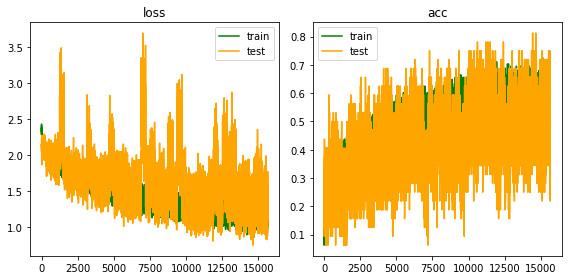

In [ ]:
epoch_loss, epoch_acc = train_my_model()

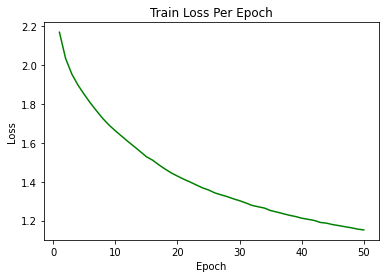

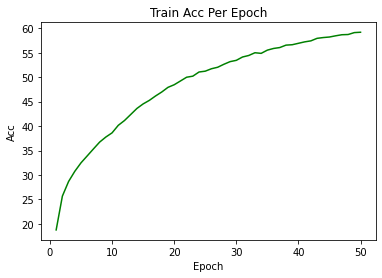

In [ ]:
plt.figure()
plt.title('Train Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1,num_epochs+1),epoch_loss.cpu().detach(),color='green',linestyle='-',label="Train_Loss")
plt.show()

plt.figure()
plt.title('Train Acc Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.plot(range(1,num_epochs+1),epoch_acc.cpu().detach(),color='green',linestyle='-',label="Train_Loss")
plt.show()



---

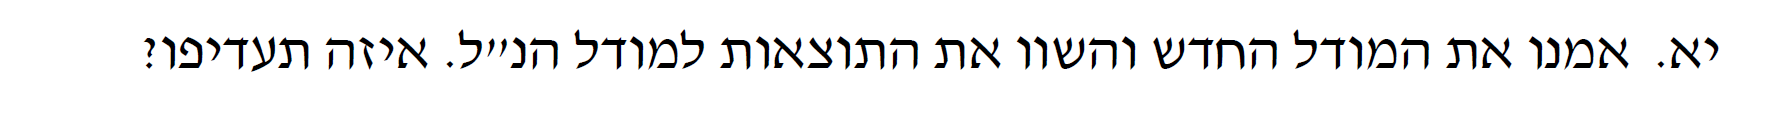

---



In [ ]:
""" Final Testing Phase """
testloss, testacc = [], []

test_final, test_final_acc = test_epoch(test_loader, my_model, criterion, testloss, testacc)
print('[FINAL TEST] Loss: {:.4f} Acc: {:.4f}%'.format(test_final, test_final_acc))


100%|██████████| 313/313 [00:24<00:00, 12.77it/s]

[FINAL TEST] Loss: 1.3086 Acc: 52.9400%


My new model performs much worse than Resnet18, it's accuracy after 50 epocs stands on ~52% while Resnet18 proved to be 80% accurate.

Therefore I will prefer Resnet18 pretrained.